<a href="https://colab.research.google.com/github/DarkWindman/Web-2024/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import re
import pandas as pd
from datetime import datetime
import pytz

def parse_str(x):
    return x[1:-1]

def parse_datetime(x):
    dt = datetime.strptime(x[1:-7], '%d/%b/%Y:%H:%M:%S')
    dt_tz = int(x[-6:-3])*60+int(x[-3:-1])
    return dt.strftime('%d-%b-%Y')

data = pd.read_csv(
    '/content/sample_data/logs.txt',
    sep=r'\s(?=(?:[^"]*"[^"]*")*[^"]*$)(?![^\[]*\])',
    engine='python',
    na_values='-',
    header=None,
    usecols=[0, 3, 4, 5, 6, 7, 8],
    names=['ip', 'time', 'request', 'status', 'size', 'referer', 'user_agent'])
data.dropna(inplace=True)


In [ ]:
# Застосовуємо функцію до колонки 'time'
data['time'] = data['time'].apply(parse_datetime)
data.head(200)

,ip,time,request,status,size,referer,user_agent
0,83.149.9.216,17-May-2015,"""GET /presentations/logstash-monitorama-2013/i...",200,203023.0,"""http://semicomplete.com/presentations/logstas...","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1..."
1,83.149.9.216,17-May-2015,"""GET /presentations/logstash-monitorama-2013/i...",200,171717.0,"""http://semicomplete.com/presentations/logstas...","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1..."
2,83.149.9.216,17-May-2015,"""GET /presentations/logstash-monitorama-2013/p...",200,26185.0,"""http://semicomplete.com/presentations/logstas...","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1..."
3,83.149.9.216,17-May-2015,"""GET /presentations/logstash-monitorama-2013/p...",200,7697.0,"""http://semicomplete.com/presentations/logstas...","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1..."
4,83.149.9.216,17-May-2015,"""GET /presentations/logstash-monitorama-2013/p...",200,2892.0,"""http://semicomplete.com/presentations/logstas...","""Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1..."
...,...,...,...,...,...,...,...
201,146.1.1.2,17-May-2015,"""GET /style2.css HTTP/1.1""",200,4877.0,"""http://www.semicomplete.com/blog/geekery/ssl-...","""Mozilla/5.0 (Windows NT 6.1; WOW64; rv:28.0) ..."
202,146.1.1.2,17-May-2015,"""GET /reset.css HTTP/1.1""",200,1015.0,"""http://www.semicomplete.com/blog/geekery/ssl-...","""Mozilla/5.0 (Windows NT 6.1; WOW64; rv:28.0) ..."
203,146.1.1.2,17-May-2015,"""GET /favicon.ico HTTP/1.1""",200,3638.0,"""-""","""Mozilla/5.0 (Windows NT 6.1; WOW64; rv:28.0) ..."
204,146.1.1.2,17-May-2015,"""GET /images/jordan-80.png HTTP/1.1""",200,6146.0,"""http://www.semicomplete.com/blog/geekery/ssl-...","""Mozilla/5.0 (Windows NT 6.1; WOW64; rv:28.0) ..."


In [ ]:
Time_sort = data.groupby("time")["ip"].nunique()
Time_sort


time
17-May-2015    325
18-May-2015    584
19-May-2015    526
20-May-2015    478
Name: ip, dtype: int64

In [ ]:
Time_sort = data.groupby("status")["user_agent"].nunique()
Time_sort

status
200    532
206      4
301     45
403      2
404     48
416      1
500      1
Name: user_agent, dtype: int64

In [ ]:
user_agent_counts = data['user_agent'].value_counts().reset_index()
user_agent_counts.columns = ['user_agent', 'count']
ranked_user_agents = user_agent_counts.sort_values(by='count', ascending=False)

print(ranked_user_agents)

                                            user_agent  count
0    "Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebK...    866
1    "UniversalFeedParser/4.2-pre-314-svn +http://f...    364
2    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_1...    305
3    "Mozilla/5.0 (Windows NT 6.1; WOW64; rv:27.0) ...    295
4    "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/5...    267
..                                                 ...    ...
413  "Mozilla/4.0 (compatible; MSIE 6.0; Windows NT...      1
414  "Mozilla/5.0 (Windows NT 6.0; rv:16.0) Gecko/2...      1
415  "Mozilla/5.0 (iPad; U; CPU OS 4_3_5 like Mac O...      1
416  "Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7...      1
541  "Mozilla/5.0 (Windows; U; Windows NT 5.1; en-U...      1

[542 rows x 2 columns]


In [ ]:
def OS_rank(user_agent):
    os_patterns = {
    'Windows': r'Windows NT [\d\.]+',
    'Mac OS': r'Mac OS X [\d_\.]+',
    'Linux': r'Linux',
    'iOS': r'iPhone OS [\d_\.]+|iPad; CPU OS [\d_\.]+',
    'Android': r'Android [\d\.]+'}
    for os, pattern in os_patterns.items():
        match = re.search(pattern, user_agent)
        if match:
            return os  # Повертаємо лише назву ОС
    return 'Unknown'

data['os'] = data['user_agent'].apply(OS_rank)
data['os'].value_counts()


os
Windows    3032
Unknown    2413
Linux      2189
Mac OS     1334
iOS         362
Name: count, dtype: int64

In [ ]:
def bot_search(user_agent):
    pattern = r'(bot|crawl|spider)'
    bot = re.search(pattern, user_agent, flags=re.IGNORECASE)
    return bool(bot)
data['bot'] = data["user_agent"].apply(bot_search)
data['bot'].value_counts()


bot
False    8243
True     1087
Name: count, dtype: int64

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


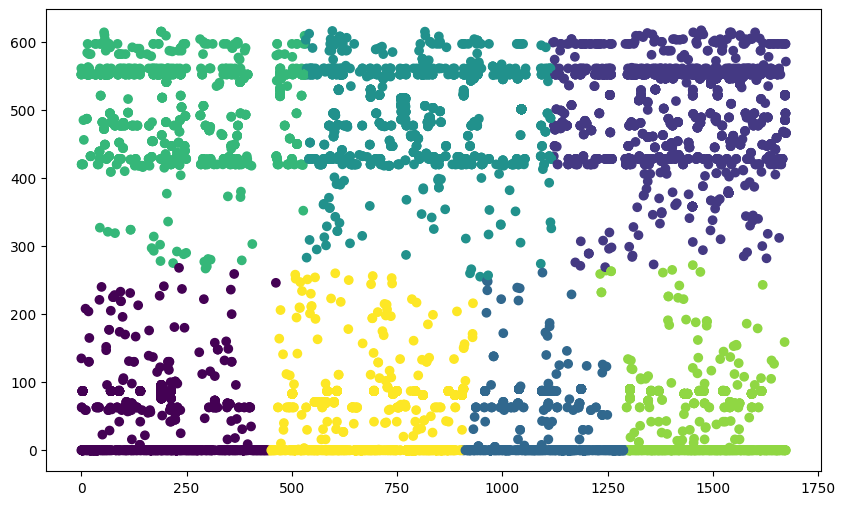

In [100]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
encoder = LabelEncoder()
data['referer_new'] = encoder.fit_transform(data['referer'])
data['ip_new'] = encoder.fit_transform(data['ip'])
an_data = data[["referer_new", "ip_new"]]
scaler =  StandardScaler()
an_data_sc = scaler.fit_transform(an_data)
kmeans = KMeans(n_clusters = 7)
data['cluster'] = kmeans.fit_predict(an_data_sc)


plt.figure(figsize=(10, 6))
plt.scatter(data['ip_new'], data['referer_new'], c=data['cluster'])

plt.show()


